In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = {
    'Age': ['Youth', 'Youth', 'Middle', 'Senior', 'Senior', 'Senior', 'Middle', 'Youth', 'Youth', 'Senior'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Credit_rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Excellent'],
    'Buys_car': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

In [4]:
df.head()

,Age,Income,Student,Credit_rating,Buys_car
0,Youth,High,No,Fair,No
1,Youth,High,No,Excellent,No
2,Middle,High,No,Fair,Yes
3,Senior,Medium,No,Fair,Yes
4,Senior,Low,Yes,Fair,Yes


In [5]:
scaler = LabelEncoder()
df_encoded = df.copy()

for col in df.columns:
    df_encoded[col] = scaler.fit_transform(df_encoded[col])

In [6]:
df_encoded.head()

,Age,Income,Student,Credit_rating,Buys_car
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,2,0,1,1
4,1,1,1,1,1


In [7]:
X = df_encoded.drop('Buys_car', axis=1)
y = df_encoded['Buys_car']

In [8]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)	

In [11]:
clf.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
df

,Age,Income,Student,Credit_rating,Buys_car
0,Youth,High,No,Fair,No
1,Youth,High,No,Excellent,No
2,Middle,High,No,Fair,Yes
3,Senior,Medium,No,Fair,Yes
4,Senior,Low,Yes,Fair,Yes
5,Senior,Low,Yes,Excellent,No
6,Middle,Low,Yes,Excellent,Yes
7,Youth,Medium,No,Fair,No
8,Youth,Low,Yes,Fair,Yes
9,Senior,Medium,No,Excellent,No


In [18]:
df_encoded

,Age,Income,Student,Credit_rating,Buys_car
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,2,0,1,1
4,1,1,1,1,1
5,1,1,1,0,0
6,0,1,1,0,1
7,2,2,0,1,0
8,2,1,1,1,1
9,1,2,0,0,0


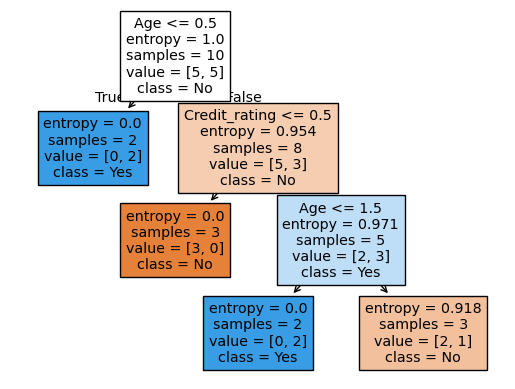

In [13]:
plt.Figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [16]:
new_data = pd.DataFrame({
    'Age': ['Youth'],
    'Income': ['Medium'],
    'Student': ['Yes'],
    'Credit_rating': ['Fair']
})

for col in new_data.columns:
    new_data[col] = scaler.fit(df[col]).transform(new_data[col])


In [17]:
# Predict
prediction = clf.predict(new_data)
print("Prediction (0=No, 1=Yes):", prediction[0])

# Predict probability
prediction_prob = clf.predict_proba(new_data)
print("Prediction probability:", prediction_prob)

Prediction (0=No, 1=Yes): 0
Prediction probability: [[0.66666667 0.33333333]]
